# Lecture 2 - Conditional Probabilities, Bayes' Rule, and Maximum a Posteriori Estimation

## Today's Learning Objectives

1. Illustrate the concept of conditional probability.
2. Apply the Bayes rule to probabilistic inquiries.
3. Introduce the concept of maximum a posteriori (MAP) estimation.
4. Relate MAP with maximum likelihood (MLE) estimation.

## 0. What is next?

Previously, we discussed **the drawbacks frequentist inference could have**. Hence, we concluded we might need a better approach for complex systems while leaving some wiggle room to randomness (i.e., a **probabilistic generative model**). 

Furthermore, our modelling might need to incorporate **latent variables** if we cannot directly observe our variable of interest.

```{important}
Both types of inference, frequentist and Bayesian, could use **probabilistic generative models** but the difference lies in their **statistical reasoning**. 
```

```{exercise}
:label: lecture2-q1

**Answer TRUE or FALSE:**

**Bayesians assume that population parameters are random**, unlike frequentists who assume these parameters are fixed.

**A.** TRUE

**B.** FALSE
```

Let us recall the concept of **recursive updating**.

<br>
<center><img width="700" src="https://www.bayesrulesbook.com/chapters/figs/chapter_1/bayes_diagram.png"/></center>

*Source: [Johnson et al. (2021)](https://www.bayesrulesbook.com/chapter-1.html)*

## 1. Conditional Probability

This lecture will retake different probability concepts you might already be familiar with (**from DSCI 551**). Nonetheless, these concepts will pave the way to a key concept in this inferential course: **the Bayes' rule**.

<center>        
<img src="https://logos-world.net/wp-content/uploads/2020/09/Tinder-Logo.png" width="300" height="170"/>
</center>
        
To illustrate these concepts, **for the single population living in Vancouver looking for a partner**, let us suppose we want to estimate the probability of finding a partner **given** they have used the Tinder app. 

We collect a random sample from this population of interest, follow them up for two months, and get our study results involving whether they found a partner or not, along with whether they used Tinder (**since we started monitoring them**).

Note the following:

- We have a sample $S$, whose **cardinality** (*i.e., number of subjects within the dataset*) is $\mid S \mid$. **This cardinality is basically our sample size.**
- Let $L$ be the following **primary** event of interest: **they found a partner** (<font color='red'>$L$ for love </font>). Then, with $\mid L \mid$ being the cardinality of this subset of sampled people, its probability will be defined by

$$P(L) = \frac{\mid L \mid}{\mid S \mid}.$$

Graphically, the event $L$ can be represented as:

```{figure} ../img/venn_A.jpg
:height: 350px
:name: venn_A
```

Calculating $P(L)$ is really straightforward using our sampled data. However, in many instances, we would like to update our sampling space based on a **secondary** event of interest. 

That is right! This other event of interest is **using Tinder to find a partner**.

Thus, let us define $T$ as: **using Tinder to find a partner**. Then, with $\mid T \mid$ being the cardinality of this subset of sampled people, its probability will be defined by

$$P(T) = \frac{\mid T \mid}{\mid S \mid}.$$

Graphically, the event $T$ can be represented as:

```{figure} ../img/venn_B.jpg
:height: 350px
:name: venn_B
```

Moreover, assume we have subjects in our sample who found partner **and** used Tinder; i.e., there is an intersection of events: $L \cap T$. Then, with $\mid L \cap T \mid$ being the cardinality of this subset of sampled people, its probability will be defined by

$$P(L \cap T) = \frac{\mid L \cap T \mid}{\mid S \mid}$$

Graphically, the event $L \cap T$ (i.e., $L$ **and** $T$) can be represented as:

```{figure} ../img/venn_C.jpg
:height: 350px
:name: venn_C
```

**From the perspective of a Tinder user who is using the app the find a partner**, recall our initial objective: *we want to infer the probability of finding a partner **given** we use the Tinder app in Vancouver*. In probability notation, this is coded as a conditional probability: 

$$P(L \mid T) = \text{Probability of finding a partner GIVEN we use Tinder}$$

We zoom in the previous figure:

```{figure} ../img/venn_D.jpg
:height: 350px
:name: venn_D
```

**Let us focus on the areas indicating the event $T$ and intersection $L \cap T$ (i.e., $L$ and $T$).** Thus, how can we compute $P(L \mid T)$?

Our previous probability calculations will help us as follows:

```{math}
\begin{align*}
P(L \mid T) &= \frac{\mid L \cap T \mid}{\mid T \mid} \\
&= \frac{\frac{\mid L \cap T \mid}{\mid S \mid}}{\frac{\mid T \mid}{\mid S \mid}} && \text{diving numerator and denominator over } \mid S \mid \\
&= \frac{P(L \cap T)}{P(T)}
\end{align*}
```

We just derived the conditional probability formula for $P(L \mid T)$.

```{attention}
$P(L \mid T)$ will be the **ultimate finding** in this lecture.
```

````{admonition} Formal Definition of Conditional Probability
:class: important
Let $L$ and $T$ be two events of interest within the sample $S$, and $P(T) > 0$, then the **conditional probability** of $L$ given $T$ is defined as:

```{math}
:label: cond-prob
P(L \mid T) = \frac{P(L \cap T)}{P(T)}
```
````

```{exercise}
:label: lecture2-q2

What is going on in the equation {eq}`cond-prob`? **Select the correct answer.**

**A.** Event $L$ becomes the new sample space.

**B.** Event $T$ becomes the new sample space.

**C.** The sample space $S$ remains the same under condition $T$.
```

## 2. Bayes' Rule Fundamentals

Let us proceed with our Tinder study! We will put in practice the workflow of the **recursive updating** in a first iteration.

<br>
<center><img width="700" src="https://www.bayesrulesbook.com/chapters/figs/chapter_1/bayes_diagram.png"/></center>

*Source: [Johnson et al. (2021)](https://www.bayesrulesbook.com/chapter-1.html)*

### 2.1. Main Statistical Inquiry

We must set up our main inquiry if we implement the Bayesian recursive updating. Suppose your are a social local researcher and Tinder enthusiast:

> Via our **observed data** (a.k.a, **observed evidence**) and **prior social research**, we want to make inference on the probability of finding a partner **given** we used the Tinder app in Vancouver, i.e., $P(L \mid T)$.

### 2.2. The Data

Let us start with the data. Suppose we collected the data from the population of interest (**adult single people in Vancouver**) via a sample of size `100`. The dataset `tinder_obs_sample` has two variables of interest: `tinder` (`User` or `Non-User`) and `rel_status` (`Partnered` or `Non-Partnered`).

In [1]:
options(repr.matrix.max.rows = 6)
library(janitor)
library(tidyverse)
library(scales)


Attaching package: ‘janitor’


The following objects are masked from ‘package:stats’:

    chisq.test, fisher.test


── Attaching core tidyverse packages ─────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ───────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘scales’


The following object is masked from ‘package:purrr’:

    discard


The following object is masked from ‘package:readr’:

    col_factor




In [2]:
tinder_obs_sample <- read_csv("../data/tinder_obs_sample.csv", show_col_types = FALSE)
tinder_obs_sample

tinder,rel_status
<chr>,<chr>
User,Non-Partnered
User,Non-Partnered
Non-User,Partnered
⋮,⋮
User,Non-Partnered
Non-User,Partnered
User,Partnered


We will follow the same flow you can find in [Chapter 2 of Bayes Rules!](https://www.bayesrulesbook.com/chapter-2#michelle-simple) to explain the core Bayesian concepts (**Example: Pop vs soda vs coke**). But firstly, stacked bar charts by proportions can give us a useful graphical insight.

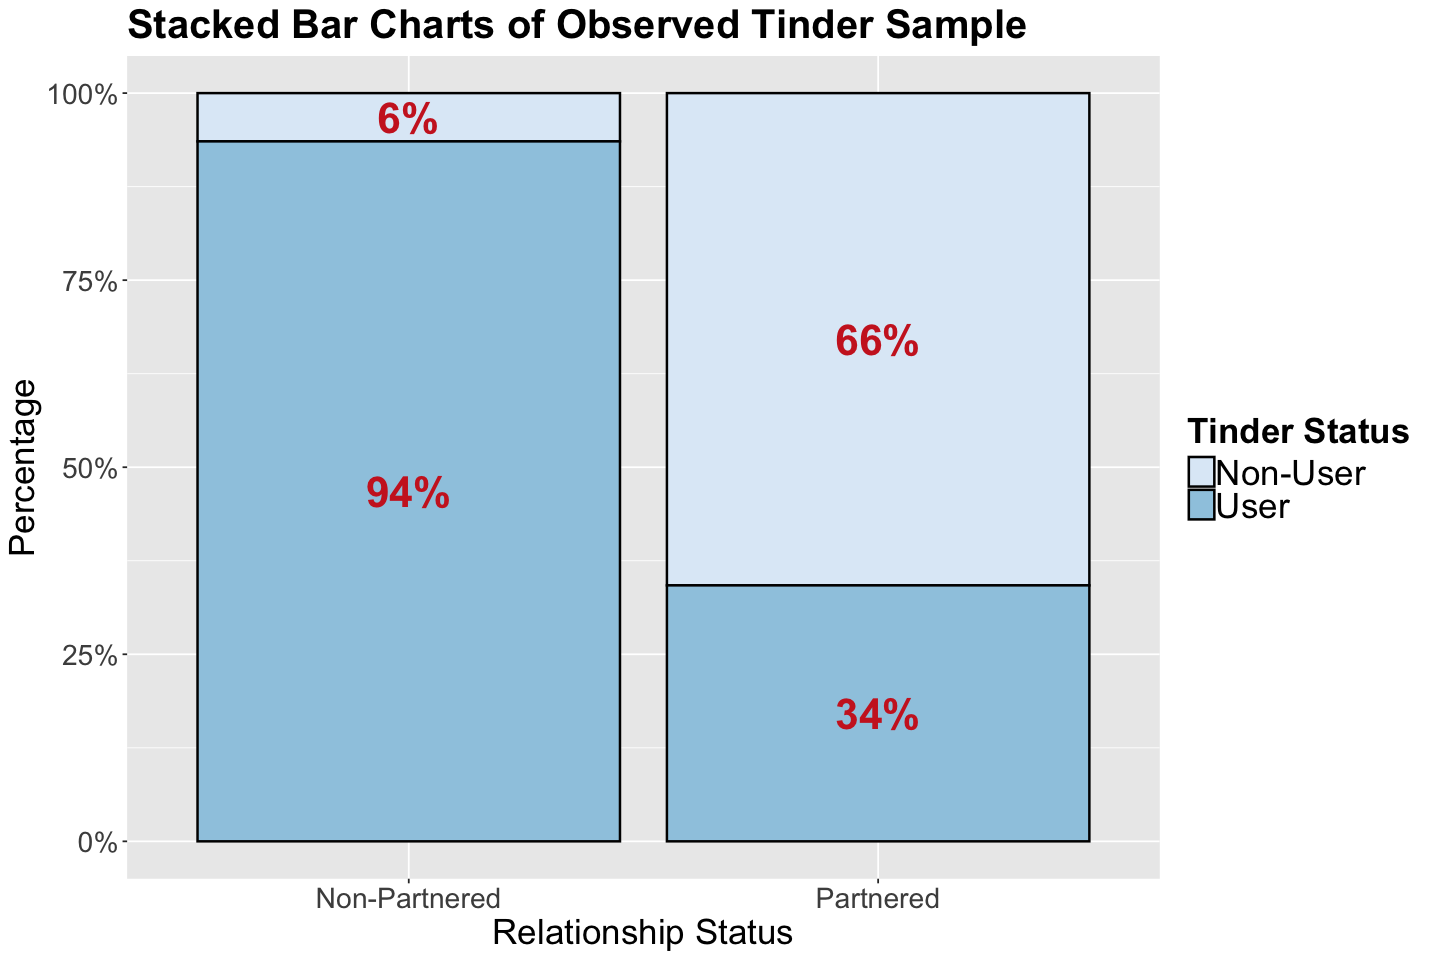

In [3]:
options(repr.plot.height = 8, repr.plot.width = 12)

# Proportions summary
tinder_sample.prop.summary <- as.data.frame(xtabs(
  ~ rel_status +
    tinder,
  tinder_obs_sample
) / rowSums(xtabs(
  ~ rel_status + tinder,
  tinder_obs_sample
)), responseName = "prop")

# Stacked bar charts
tinder_sample.stacked.bars <- ggplot(tinder_sample.prop.summary, aes(
  x = rel_status,
  y = prop, fill = tinder
)) +
  geom_bar(stat = "identity", linewidth = 0.7, colour = "black") +
  geom_text(aes(label = ifelse(prop >= 0.05, paste0(sprintf("%.0f", prop * 100), "%"), "")),
    position = position_stack(vjust = 0.5), colour = "firebrick3", fontface = "bold", size = 9
  ) +
  scale_y_continuous(labels = percent_format()) +
  labs(y = "Percentage", x = "Relationship Status", fill = "") +
  ggtitle("Stacked Bar Charts of Observed Tinder Sample") +
  theme(
    plot.title = element_text(size = 24, face = "bold"),
    axis.text.x = element_text(size = 17, angle = 0),
    axis.text.y = element_text(size = 17, angle = 0),
    axis.title = element_text(size = 21),
    legend.text = element_text(size = 21, margin = margin(r = 1, unit = "cm")),
    legend.title = element_text(size = 21, face = "bold")
  ) +
  guides(fill = guide_legend(title = "Tinder Status")) +
  scale_fill_brewer(palette = "Blues")

tinder_sample.stacked.bars

**From our observed evidence**, note that the use of Tinder does not look too promising.

### 2.3. The Prior

Our **primary** event of interest would be $L$ (**they found a partner**). Suppose you found a **prior Vancouver observational study** of size `200` called `prior_sample`. Nevertheless, they only observed whether the adult subjects were partnered or not. 

```{attention}
Note this `prior_sample` in our Bayesian inference **will give us valuable PRIOR insights into how Vancouver's population behaves in terms of whether they are more prone to be in a relationship or not**. This is quite important for us to know, besides using Tinder to be in a relationship!
```

In [4]:
prior_sample <- read_csv("../data/prior_sample.csv", show_col_types = FALSE)
prior_sample |> 
  tabyl(rel_status) |> 
  adorn_totals("row") 

,rel_status,n,percent
,<chr>,<int>,<dbl>
1,Non-Partnered,84,0.42
2,Partnered,116,0.58
3,Total,200,1.00


Now, **suppose we want to infer the relationship status of adults in Vancouver**; our prior probability model (determined by the `prior_sample`) provides these probabilities:

```{math}
\begin{gather*}
P_{prior}(L) = 0.58 \\
P_{prior}(L^c) = 1 - 0.58 = 0.42
\end{gather*}
```

Note these prior probabilities add up to one, i.e., we are considering all possible outcomes in $L$ (**which is binary in this case!**). It is more probable that an adult person is partnered in this city, as we can see from the **sampled** prior probabilities!

### 2.4. Conditional Probability and Likelihood

We will get even more information from `tinder_obs_sample` by taking into account the use of Tinder (i.e., event $T$). **This data incorporation will determine whether the use of Tinder is more related to people that end up partnered compared to those who remain single (as shown in our previous stacked bar charts).** We need to obtain these conditional probabilities: 

$$P(T \mid L) = \frac{P(T \cap L)}{P(L)} \quad \text{and} \quad P(T \mid L^c) = \frac{P(T \cap L^c)}{P(L^c)}$$

```{important}
We need to clarify that $P(T \mid L) \neq P(L \mid T)$. **$P(L \mid T)$ is our ultimate inferential result according to the main statistical inquiry.**
```

**How can we compute $P(T \mid L)$ and $P(T \mid L^c)$?** We need the following absolute frequencies:

In [5]:
tinder_obs_sample |> 
  tabyl(rel_status, tinder) |> 
  adorn_totals("row") 

,rel_status,Non-User,User
,<chr>,<dbl>,<dbl>
1,Non-Partnered,4,58
2,Partnered,25,13
3,Total,29,71


Hence:

```{math}
\begin{gather*}
P(T \mid L) = \frac{P(T \cap L)}{P(L)} = \frac{\frac{13}{100}}{\frac{25 + 13}{100}} = 0.34 \\
P(T \mid L^c) = \frac{P(T \cap L^c)}{P(L^c)} = \frac{\frac{58}{100}}{\frac{4 + 58}{100}} = 0.94
\end{gather*}
```

These two results can be found in our stacked bar charts. We can interpret them as follows:

- $P(T \mid L)$: **IF** a person ends up partnered, there is a 34% chance they used Tinder.
- $P(T \mid L^c)$: **IF** a person remains single, there is a 94% chance they used Tinder.

These two previous conditional probabilities are the evidence provided by our `tinder_obs_sample`, which incorporates both events of interest: $L$ and $T$. According to these results, a single person in Vancouver who uses Tinder is more **LIKELY** to remain single than end up partnered.

```{caution}
**Possibly**, we might be confused about whether our study is actually giving us $P(L \mid T)$ instead of $P(T \mid L)$. Therefore, we might be tempted to say: 

> *OK, we do not need to use any Bayesian reasoning with prior knowledge since our study suffices! Then, we would solve our main statistical right away.*

However, **that is not the case in the Bayesian world**.
```

Having said that, the **"more likely"** idea paves the way to another core concept in Bayesian inference: **the likelihood function**. 

We use the following notation:

$$\mathscr{l}(L \mid T) = P(T \mid L) \quad \text{and} \quad \mathscr{l}(L^c \mid T) = P(T \mid L^c)$$

How to interpret $\mathscr{l}(L \mid T)$ and $\mathscr{l}(L^c \mid T)$?

- $\mathscr{l}(L \mid T) = 0.34$ indicates how likely a person will end up partenered if we primarily know they use Tinder. **The use of Tinder is our primary observed evidence.**
- $\mathscr{l}(L^c \mid T) = 0.94$ indicates how likely a person will remain single if we primarily know they use Tinder. **The use of Tinder is our primary observed evidence.**


```{attention}
A likelihood function is **NOT** a probability function, thus it does **NOT** need to add up to one.
```

The following table summarizes our event of interest $L$ (being partenered or not):

| Event | $L$ | $L^c$ | Total|
| --- | --- | --- | --- |
| Prior | 0.58 | 0.42 | 1 |
| Likelihood | 0.34 | 0.94 | 1.28 |

```{important}
Note the data (likelihood of 0.94) suggests that using Tinder to to find a partner in Vancouver is not the best idea! This is the evidence provided by our `tinder_obs_sample`.
```

### 2.5. Normalizing Constant

We are almost getting into the Bayes' rule and posterior probabilities to solve our inquiry.

Now, we proceed to a concept called the **normalizing constant**. A normalizing constant refers to the marginal probability of using Tinder **regardless** we end up partnered or not. Let us find this normalizing constant via `tinder_obs_sample` and `prior_sample`.

In this specific case, for our ultimate goal $P(L \mid T)$, check the following:

```{math}
\begin{align*}
P(L \mid T) &= \frac{P(L \cap T)}{P(T)} \\
&= \frac{P_{prior}(L) \times P(T \mid L)}{P(T)} \\
&= \frac{P_{prior}(L) \times \mathscr{l}(L \mid T)}{P(T)} \\
&= \frac{0.58 \times 0.34}{P(T)},
\end{align*}
```

where $P_{prior}(L) = 0.58$ is the estimated proportion of partnered adults in Vancouver coming from the `prior_sample`, and $\mathscr{l}(L \mid T) = 0.34$ indicates how likely a person will end up partenered if we primarily know they use Tinder (coming from `tinder_obs_sample`).

Nevertheless, $P(T)$ is missing and we call it the normalizing constant. We can easily obtain it through the **Law of Total Probability** (note the tweak in the second line to **observed likelihood values**!):

```{math}
\begin{align*}
P(T) &= [P(T \mid L) \times P_{prior}(L)] + [P(T \mid L^c) \times P_{prior}(L^c)]  \\
&= [\mathscr{l}(L \mid T) \times P_{prior}(L)] + [\mathscr{l}(L^c \mid T) \times P_{prior}(L^c)] \\
&= (0.34 \times 0.58) + (0.94 \times 0.42) \\
&= 0.592.
\end{align*}
```

```{attention}
$P_{prior}(L)$ and $P_{prior}(L^c)$ come from `prior_sample`, whereas $\mathscr{l}(L \mid T)$ and $\mathscr{l}(L^c \mid T)$ come `tinder_obs_sample`.
```

### 2.6. Bayes' Rule and Posterior Probability

Using our previous computation, we plug in $P(T)$:

$$P(L \mid T) = \frac{0.58 \times 0.34}{0.592} = 0.33.$$

We can do something analogous with $P(L^c \mid T)$:

```{math}
\begin{align*}
P(L^c \mid T) &= \frac{P(L^c \cap T)}{P(T)} \\
&= \frac{P_{prior}(L^c) \times P(T \mid L^c)}{P(T)} \\
&= \frac{P_{prior}(L^c) \times \mathscr{l}(L^c \mid T)}{P(T)} \\
&= \frac{0.42 \times 0.94}{0.592} = 0.67.
\end{align*}
```

**Note this is the complement of $P(L \mid T)$.**

Given our results in $P(L \mid T)$ and $P(L^c \mid T)$, we can produce the following table:

| Event | $L$ | $L^c$ | Total|
| --- | --- | --- | --- |
| Prior | 0.58 | 0.42 | 1 |
| Posterior | 0.33 | 0.67 | 1 |

Let us answer our main statistical inquiry:

> As a single person in Vancouver, there is a 33% chance we will end up partnered **IF** we use Tinder. Moreover, there is a 67% chance we will **NOT** end up partnered **IF** we use Tinder. 

Now, our posterior knowledge of ending up partnered or not was updated with incorporating the information conditioned on the use of Tinder (the prior model **DID NOT** include that). Therefore, according to this posterior model, **it is VERY DISHEARTENING to use Tinder to find a partner in Vancouver**.

```{important}
**This is Bayesian inference!**

1. Hidden variables of interest are **random** (the **prior distribution**).
2. We use the **conditional distribution** of hidden variables given observations (the **posterior distribution**) to capture uncertainty.
```

**Formal Definition of Bayes' Rule**

Let $L$ and $T$ be two events of interest, the posterior probability of $L$ given $T$ is given by:

$$P(L \mid T) = \frac{P(L \cap T)}{P(T)} = \frac{P(L) P(T \mid L)}{P(T)},$$

where the total probability is

```{math}
\begin{align*}
P(T) &= [P(T \mid L) \times P(L)] + [P(T \mid L^c) \times P(L^c)].
\end{align*}
```

In general, for any continous or discrete case, this is defined as:

```{math}
:label: full-bayes-rule
\text{posterior} = \frac{\text{prior} \times \text{likelihood}}{\text{normalizing constant}}
```

$$\text{posterior} \propto \text{prior} \times \text{likelihood}$$

**We know the likelihood and prior, they are our generative model!**

**Once you have the posterior, you have everything!**

The posterior distribution is ... well, a distribution! So we can use it for:

- **Point Estimates:** mean, mode, median.
- **Uncertainty:** variance, credible intervals.
- **Prediction:** generate more data given previous data.

Our description of uncertainty is intuitive; it is a probability distribution over the parameters we do not know!

### 2.7. Rule of Independent Events

Once we have defined the Bayes' rule, we can proceed with the rule of independent events. Aside from our previous example, assume that event $T$ has **no effect** on event $L$. We can represent this matter as follows:

$$P(L \mid T) = P(L).$$

**If the statement above holds**, by the Bayes' rule, we have:

```{math}
\begin{align*}
P(T \mid L) &= \frac{P(T \cap L)}{P(L)} = \frac{P(L \mid T) P(T)}{P(L)} \\
&= \frac{P(L) P(T)}{P(L)} \qquad \qquad \text{since } P(L \mid T) = P(L)\\
&= P(T).
\end{align*}
```

Again, using the Bayes' rule, how can we obtain $P(T \cap L)$? We have that:

$$P(T \cap L) = P(T \mid L) P(L).$$

And we previously derived that:

$$P(T \mid L) = P(T).$$

Therefore, two events ($L$ and $T$) are statistically independent if

$$P(T \cap L)  = P(T) \times P(L).$$

## 3. Maximum a Posteriori Estimation (MAP) and Maximum Likelihood Estimation (MLE)

**Maximum a posteriori (MAP) estimation is the Bayesian version of maximum likelihood estimation (MLE).** Let us compare both approaches:

- MLE aims to find the value that maximizes the sample's likelihood function (i.e., we are just relying on our observed sampled data!).
- MAP aims to obtain the value that maximizes our posterior distribution, which was obtained with our **observed data** (i.e., our evidence via the likelihood) weighted by our **prior probability model**. Recall the fundamental result for our posterior:

$$\text{posterior} \propto \text{prior} \times \text{likelihood}$$

Mathematically, we can define the MAP as:

$$\theta^\star_{\text{MAP}} = \arg\!\max_\theta f_{\theta | \mathbf{x}}(\theta)$$

where $f_{\theta | \mathbf{x}}(\theta)$ is the posterior distribution of our parameter of interest $\theta$ **given** our observed data $\mathbf{x} = (x_1, \dots, x_n)'$ (the likelihood) weighted by our prior belief on $\theta$.

In practice, using the posterior probability distribution of our parameter of interest, we can obtain the MAP:

- It will be the value associated with the maximum posterior probability in the case of a continuous population parameter of interest.
- It will be the category with the largest posterior probability in discrete variables of this class. For instance, the event **not ending up partnered ($L^c$)** in the Tinder example.

| Event | $L$ | $L^c$ | Total|
| --- | --- | --- | --- |
| Prior | 0.58 | 0.42 | 1 |
| Posterior | 0.33 | 0.67 | 1 |

## 4. Wrapping Up

- Conditional probability is necessary to get into the Bayes' rule.
- In Bayesian inference, we rely on two key components to obtain our posterior probability: the likelihood (evidence provided by our data) and the prior probability model for our parameter of interest (our prior belief).
- The Bayes' rule applies to both discrete and continuous random variables.
- In Bayesian inference, MAP is the replacement of MLE.

## 5. Probability Puzzle (if time permits)

The following puzzle was taken from [Casella and Berger (2002)](https://webcat.library.ubc.ca/vwebv/holdingsInfo?bibId=2519113).

> When coded messages are sent, there are sometimes errors in transmission. In particular, Morse code uses "dots" and "dashes", which are known to occur in the proportion of 3:4. This means that for any given symbol,
>
>$$P(\text{dot sent}) = \frac{3}{7} \quad \text{and} \quad P(\text{dash sent}) = \frac{4}{7}.$$
>
> Suppose there is intereference on the transmission line, and with probability $\frac{1}{8}$ a dot is mistakenly received as a dash, and vice versa. **If we receive a dot, what is the probability that a dot was sent?**

**Answer**

Using the so-called Bayes' rule, we have the following:

```{math}
\begin{align*}
P(\text{dot sent} \mid \text{dot received}) &= \frac{P(\text{dot sent} \cap \text{dot received})}{P(\text{dot received})} \\
&= \frac{P(\text{dot received} \mid \text{dot sent}) P(\text{dot sent})}{P(\text{dot received})}.
\end{align*}
```

We know the following:

$$P(\text{dot sent}) = \frac{3}{7}$$

```{math}
\begin{align*}
P(\text{dot received} \mid \text{dot sent}) &= 1 - P(\text{dash received} \mid \text{dot sent}) \\
&= 1 - \frac{1}{8} = \frac{7}{8}.
\end{align*}
```

We already have two probabilities. Now, how can we obtain $P(\text{dot received})$?

Let us apply the law of **total probability** we just saw in the Tinder example:

```{math}
\begin{align*}
P(\text{dot received}) &= P(\text{dot received} \cap \text{dot sent}) + P(\text{dot received} \cap \text{dash sent})\\
&= P(\text{dot received} \mid \text{dot sent}) P(\text{dot sent}) + (\text{dot received} \mid \text{dash sent}) P(\text{dash sent}) \\
&= \frac{7}{8} \times \frac{3}{7} + \frac{1}{8} \times \frac{4}{7} = \frac{25}{56}.
\end{align*}
```

Now, we have the three probabilities!

$$P(\text{dot sent} \mid \text{dot received}) = \frac{P(\text{dot received} \mid \text{dot sent}) P(\text{dot sent})}{P(\text{dot received})} = \frac{(7/8) \times (3/7)}{25/56} = \frac{21}{25}.$$